<a href="https://colab.research.google.com/github/chandusayhi/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Dataset Information**

- **Hotel**
 * H1: Resort hotel 
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_number**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


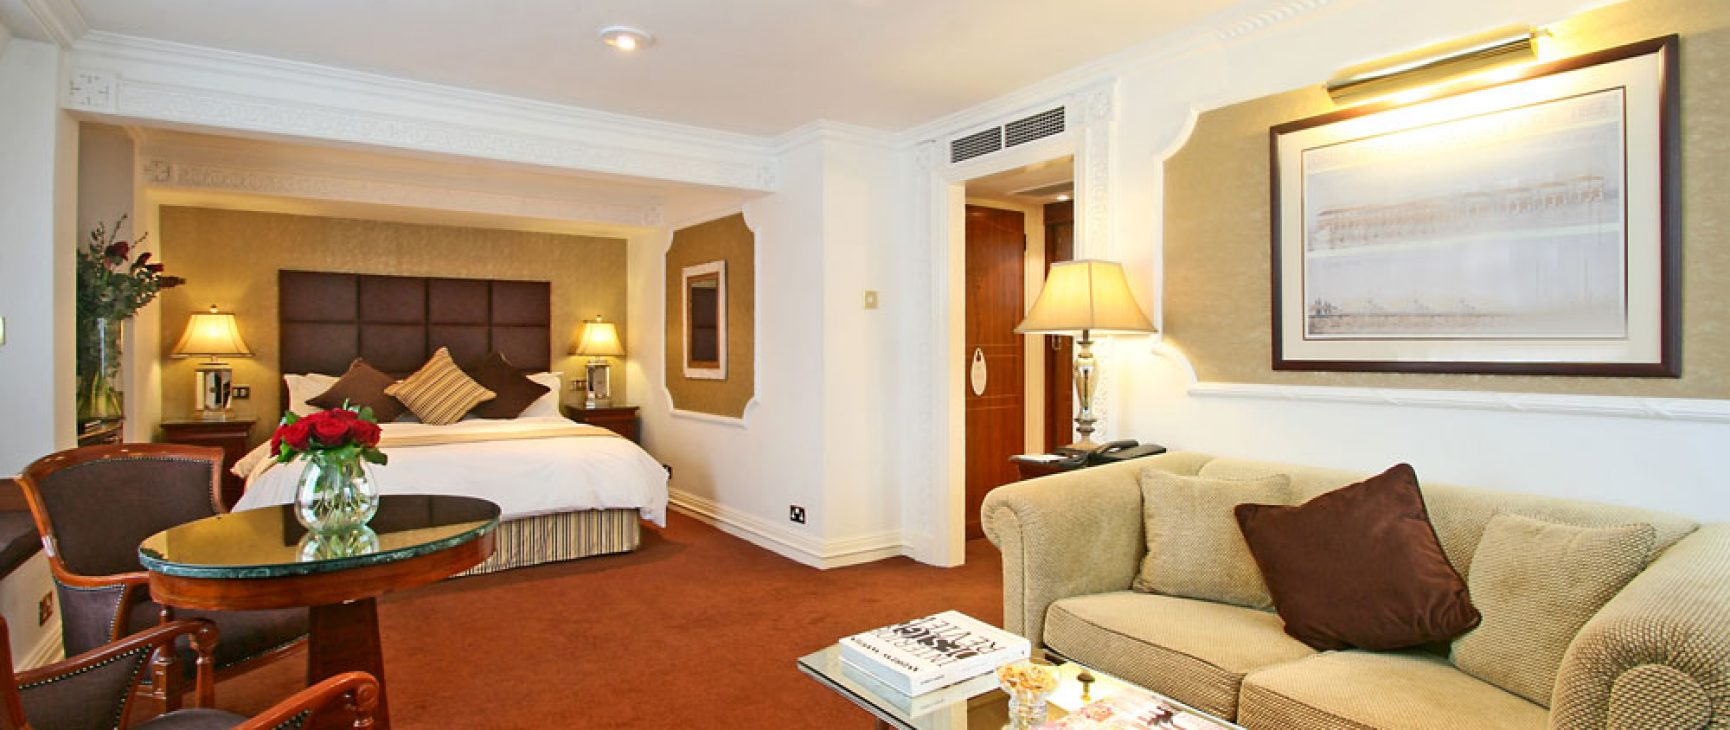

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("dark")

In [13]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/EDA_Hotel_Booking_Analysis/Hotel Bookings.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [17]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [27]:
data = df.copy()

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [24]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [25]:
data.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [26]:
perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


0.003% of rows have missing information for children. Let's look at distribution of children to fill missing information

In [29]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Most bookings had no children and hence we will fill the missing rows for children with value 0

In [30]:
data['children'].fillna(0,inplace=True)

In [33]:
data['children'].isnull().sum()

0

In [31]:
data['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

0.4% of rows have missing information for country. Let's look at distribution of country to fill missing information

In [34]:
perc_country_data = pd.DataFrame([data['country'].value_counts(),data['country'].value_counts()*100/data.shape[0]]).T
perc_country_data.columns = ['Count', '% Distribution']
perc_country_data

,Count,% Distribution
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
NCL,1.0,0.000838
MRT,1.0,0.000838
ATF,1.0,0.000838
PYF,1.0,0.000838


40.7% of bookings are from Portugal. Only 0.4% is missing information. We will fill the missing rows of country as Portugal since the distribution will not change by much and we still get to preserve data and discard the row.

In [36]:
data['country'].fillna('PRT',inplace=True)

In [37]:
data['country'].isnull().sum()

0

13% of agent ID and 94% of company ID is missing. It is possible to dive deep into the details of the dataset to find a correlation of missing information in agent ID and company ID vs other other features like market segment, distribution channel etc; For example most direct bookings may not have an agent ID or company ID and the information is probably null. It is therefore possible to fill these missing values based on other features however for simplicity, we will drop both the columns

In [38]:
data.drop(['agent','company'],axis=1,inplace=True)

Let's confirm all missing data have been handled

In [40]:
perc_missing_data = pd.DataFrame([data.isnull().sum(),data.isnull().sum()*100.0/data.shape[0]]).T
perc_missing_data.columns = ['No. of Missing Data', '% Missing Data']
perc_missing_data

,No. of Missing Data,% Missing Data
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0
